In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras import layers
import keras
from keras.models import Sequential
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib.patches import Patch
import itertools
from collections import deque

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.metrics import plot_confusion_matrix
class_names = ["Blues","Classical","Country","Disco","Hiphop","Jazz","Metal","Pop","Reggae","Rock"]

In [ ]:
df1 = pd.read_csv("/content/features_3_sec.csv")
df1 = df1.drop(labels='filename',axis=1)

genre_list = df1.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(np.array(df1.iloc[:, :-1], dtype = float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
X_train.shape

(7492, 58)

In [ ]:
X_train

array([[ 0.        , -0.09270184, -0.57167283, ..., -0.71138795,
         0.43710563, -0.44549051],
       [ 0.        , -0.78304975,  0.68016045, ...,  0.87269321,
         0.91189702,  0.56072314],
       [ 0.        , -2.00385561,  0.24363048, ...,  0.76751354,
        -0.23500027,  1.85186635],
       ...,
       [ 0.        ,  0.32564378,  1.39259606, ...,  0.50317934,
        -0.9809061 , -0.12047969],
       [ 0.        ,  1.50023954, -2.46530371, ..., -0.65280443,
         0.89404774, -0.8230757 ],
       [ 0.        ,  2.10314092, -2.37979609, ..., -0.79051723,
         0.60182476, -0.89491961]])

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


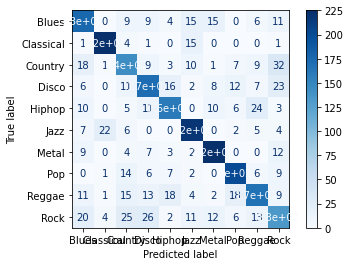

In [ ]:
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

In [ ]:
acc =  accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
print(acc)
print(cm)
print(f1)

0.7253803042433947
[[183   0  15   6   6  16  17   0   4  15]
 [  1 232   3   2   0  13   0   0   0   3]
 [ 21   1 159  12   2  16   4   4   8  27]
 [  4   1  10 152   6   1   6  12  10  29]
 [ 11   0   3  13 159   0  11   8  35   5]
 [  4  13  11   0   0 199   0   2   4   3]
 [  4   0   8   5   5   2 219   0   2  19]
 [  0   1  14   8  15   2   0 206   8   4]
 [  5   0  14   8  32   3   0   9 165  10]
 [ 12   2  25  27   6   6  17   5  10 138]]
0.7240931760827064


# SVM

In [ ]:
from sklearn.svm import SVC
classifier1 = SVC(kernel = 'rbf', random_state = 0)
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test)


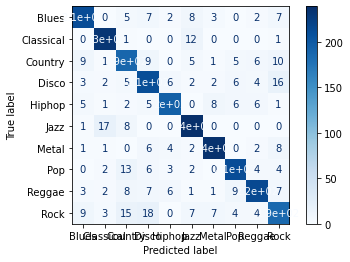

In [ ]:
disp = plot_confusion_matrix(classifier1, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

In [ ]:
acc =  accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
print(acc)
print(cm)
print(f1)

0.855484387510008
[[236   0   6   2   1   7   5   0   0   5]
 [  0 242   1   0   0   7   0   0   0   4]
 [ 11   4 200   3   0  13   1   3   5  14]
 [  2   3   4 190   2   0   4   3   3  20]
 [  3   2   2   8 207   0   5   5  11   2]
 [  3  19   6   0   0 207   0   0   0   1]
 [  2   0   0  10   3   0 237   0   1  11]
 [  0   6  11   4   8   1   0 219   5   4]
 [  1   1   6   5   6   3   2   3 213   6]
 [  5   5  17  11   2   2  12   2   6 186]]
0.8547798948380667


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 69, criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred = classifier2.predict(X_test)


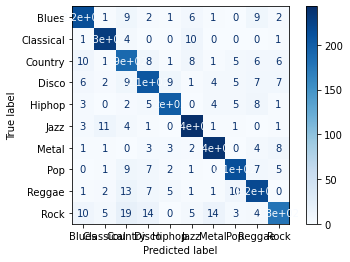

In [ ]:
disp = plot_confusion_matrix(classifier2, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

In [ ]:
acc =  accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
print(acc)
print(cm)
print(f1)

0.8566853482786229
[[226   1   6   3   2   7   7   0   8   2]
 [  1 243   0   0   0   7   0   0   1   2]
 [ 11   2 205   7   0  18   0   1   7   3]
 [  3   1   3 180   4   0   9   4  13  14]
 [  4   0   1   5 213   2   5   4   7   4]
 [  6  16  11   0   0 203   0   0   0   0]
 [  1   0   2   4   2   1 242   0   2  10]
 [  0   0  14   9   4   4   0 216  10   1]
 [  1   1   6   3  10   2   0   5 216   2]
 [  4   2  14   8   0   4  12   1   7 196]]
0.8556700307668674


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier( n_neighbors = 5, metric = 'minkowski', p =2)
classifier3.fit(X_train, y_train)

y_pred = classifier3.predict(X_test)

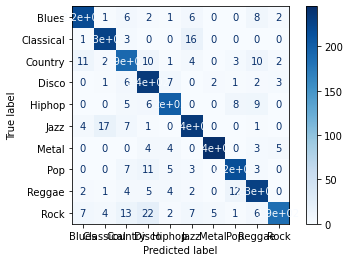

In [ ]:
disp = plot_confusion_matrix(classifier3, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

In [ ]:
acc =  accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
print(acc)
print(cm)
print(f1)

0.8847077662129704
[[243   0   4   1   1   7   0   0   5   1]
 [  0 236   2   0   0  11   0   1   0   4]
 [ 10   9 209  11   1   7   0   0   4   3]
 [  2   1   1 216   6   0   1   3   1   0]
 [  2   1   2  10 213   0   4   6   7   0]
 [  3  24   7   1   0 194   1   2   1   3]
 [  0   0   0   1   4   0 249   0   1   9]
 [  1   2  10   9  11   4   0 217   4   0]
 [  2   0   5   1   6   0   0   1 230   1]
 [  6   4   9  16   0   1   4   0   5 203]]
0.8837004941078177


# Neural Network

In [ ]:
m = Sequential()
m.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
m.add(layers.Dense(128, activation='relu'))
m.add(layers.Dense(64, activation='relu'))
m.add(layers.Dense(10, activation='softmax'))
m.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#classifier = m.fit(X_train,y_train,epochs=100,batch_size=128)

In [ ]:
y_test.shape

(2498,)

In [ ]:
history = m.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size= 32)

Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 1.4668 - accuracy: 0.4728 - val_loss: 0.7916 - val_accuracy: 0.7250
Epoch 2/50
235/235 [==============================] - 0s 2ms/step - loss: 0.7162 - accuracy: 0.7585 - val_loss: 0.6616 - val_accuracy: 0.7718
Epoch 3/50
235/235 [==============================] - 1s 2ms/step - loss: 0.5247 - accuracy: 0.8316 - val_loss: 0.5744 - val_accuracy: 0.8030
Epoch 4/50
235/235 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8689 - val_loss: 0.5111 - val_accuracy: 0.8231
Epoch 5/50
235/235 [==============================] - 0s 2ms/step - loss: 0.2976 - accuracy: 0.9011 - val_loss: 0.4713 - val_accuracy: 0.8411
Epoch 6/50
235/235 [==============================] - 0s 2ms/step - loss: 0.2626 - accuracy: 0.9115 - val_loss: 0.4694 - val_accuracy: 0.8403
Epoch 7/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1861 - accuracy: 0.9424 - val_loss: 0.4460 - val_accuracy: 0.8507
Epoch 

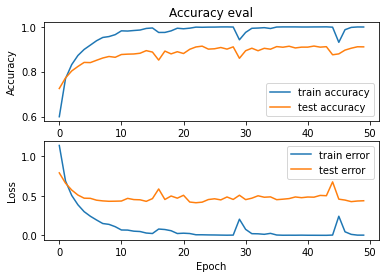

In [ ]:
fig,axs = plt.subplots(2)
axs[0].plot(history.history["accuracy"],label="train accuracy")
axs[0].plot(history.history["val_accuracy"],label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc='lower right')
axs[0].set_title("Accuracy eval")
    
axs[1].plot(history.history["loss"],label="train error")
axs[1].plot(history.history["val_loss"],label="test error")
axs[1].set_ylabel("Loss")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc='upper right')
plt.show()

In [ ]:
loss, acc  = m.evaluate(X_test, y_test, batch_size=128)
print('Loss = ',loss,'Accuracy = ',acc)

20/20 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.9103
Loss =  0.43898752331733704 Accuracy =  0.9103282690048218
